In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-classification/Customer Churn Classification.csv
/kaggle/input/customer-churn-classification/Customer Churn.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/customer-churn-classification/Customer Churn.csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values 🎉 :) Let's Proceed!

In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
# pd.set_option('display.max_rows', 10000)

In [14]:
Surname_counts = df['Surname'].value_counts()
Surname_counts

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [15]:
top23_surnames_counts = df['Surname'].value_counts().head(23)
top23_surnames_counts

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Wilson      23
White       23
Ma          23
Fanucci     23
Wang        22
Johnson     22
Moore       22
Chu         22
Lu          22
Thompson    21
Mai         21
McGregor    21
Sun         21
Name: count, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import warnings 
warnings.filterwarnings('ignore')

# Univariate Analysis

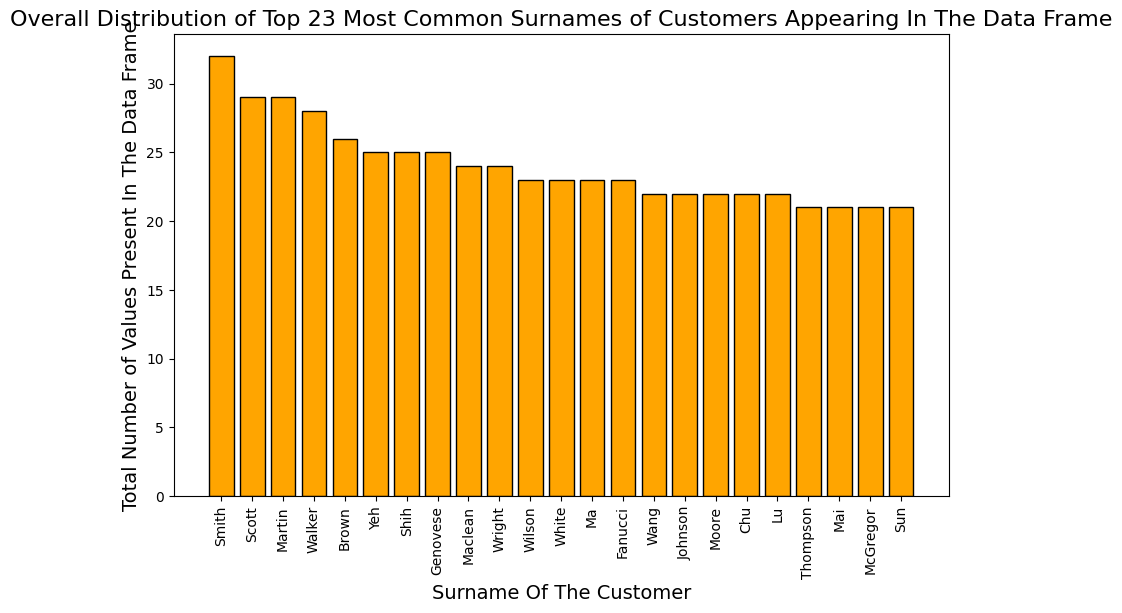

In [18]:
plt.figure(figsize=(10,6))
plt.bar(top23_surnames_counts.index, top23_surnames_counts.values, color='orange', edgecolor='black')

plt.xticks(top23_surnames_counts.index, top23_surnames_counts.index, rotation=90)

plt.xlabel("Surname Of The Customer", fontsize=14)
plt.ylabel("Total Number of Values Present In The Data Frame", fontsize=14)
plt.title("Overall Distribution of Top 23 Most Common Surnames of Customers Appearing In The Data Frame", fontsize=16)

plt.show()

In [19]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

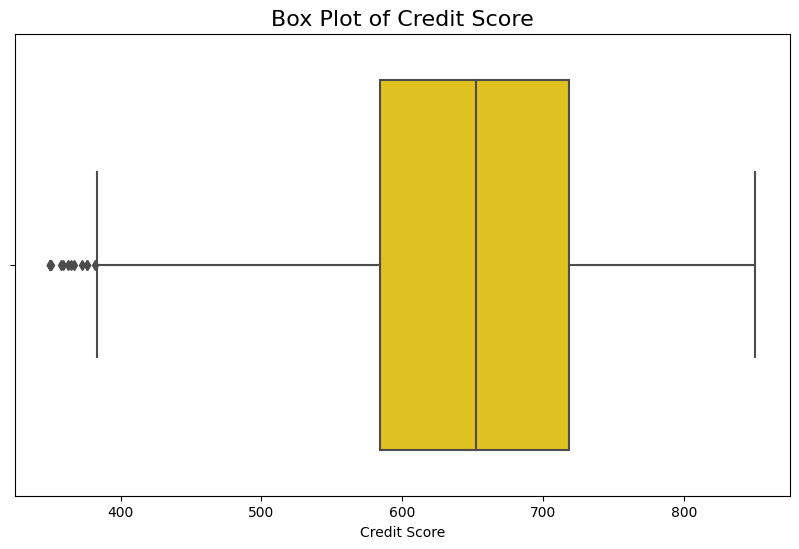

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['CreditScore'], color='gold')

plt.title('Box Plot of Credit Score', fontsize=16)
plt.xlabel('Credit Score')

plt.show()

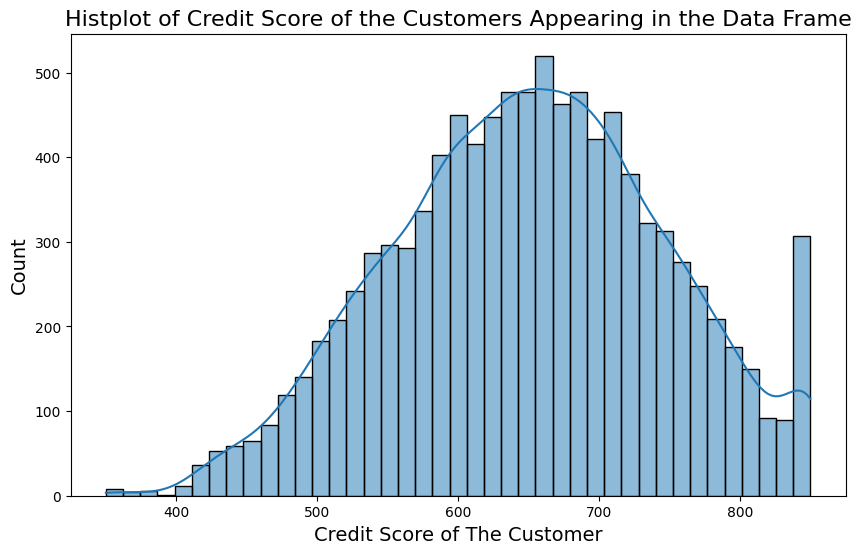

In [21]:
plt.figure(figsize=(10,6))
plt.xlabel("Credit Score of The Customer", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Histplot of Credit Score of the Customers Appearing in the Data Frame", fontsize=16)
sns.histplot(data=df, x="CreditScore", kde=True)

plt.show()

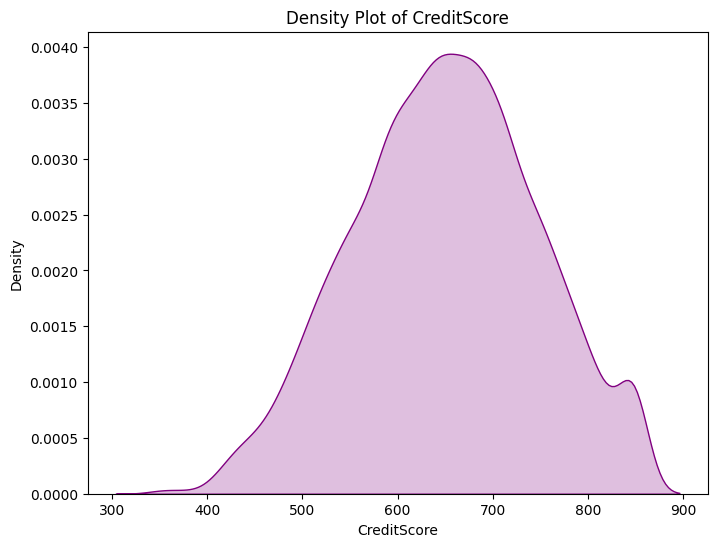

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='CreditScore', shade=True, color='purple')
plt.title('Density Plot of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Density')
plt.show()

In [23]:
Geography_counts = df['Geography'].value_counts()
Geography_counts

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
import warnings
warnings.filterwarnings('ignore')

# Customer Churn by Country Analysis 🌍🗺️

In [27]:
data = {'Country': ['France', 'Germany', 'Spain'],
       'Density': [5014, 2509, 2477]}

In [28]:
country_df = pd.DataFrame(data)
country_df

Country  Density
0   France     5014
1  Germany     2509
2    Spain     2477

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [30]:
europe = world[(world['continent'] == 'Europe')]
europe

pop_est continent              name iso_a3  gdp_md_est  \
18   144373535.0    Europe            Russia    RUS     1699876   
21     5347896.0    Europe            Norway    NOR      403336   
43    67059887.0    Europe            France    FRA     2715518   
110   10285453.0    Europe            Sweden    SWE      530883   
111    9466856.0    Europe           Belarus    BLR       63080   
112   44385155.0    Europe           Ukraine    UKR      153781   
113   37970874.0    Europe            Poland    POL      595858   
114    8877067.0    Europe           Austria    AUT      445075   
115    9769949.0    Europe           Hungary    HUN      163469   
116    2657637.0    Europe           Moldova    MDA       11968   
117   19356544.0    Europe           Romania    ROU      250077   
118    2786844.0    Europe         Lithuania    LTU       54627   
119    1912789.0    Europe            Latvia    LVA       34102   
120    1326590.0    Europe           Estonia    EST       31471   
121   83132799.0    Europe           Germany    DEU     3861123   
122    6975761.0    Europe          Bulgaria    BGR       68558   
123   10716322.0    Europe            Greece    GRC      209852   
125    2854191.0    Europe           Albania    ALB       15279   
126    4067500.0    Europe           Croatia    HRV       60752   
127    8574832.0    Europe       Switzerland    CHE      703082   
128     619896.0    Europe        Luxembourg    LUX       71104   
129   11484055.0    Europe           Belgium    BEL      533097   
130   17332850.0    Europe       Netherlands    NLD      907050   
131   10269417.0    Europe          Portugal    PRT      238785   
132   47076781.0    Europe             Spain    ESP     1393490   
133    4941444.0    Europe           Ireland    IRL      388698   
141   60297396.0    Europe             Italy    ITA     2003576   
142    5818553.0    Europe           Denmark    DNK      350104   
143   66834405.0    Europe    United Kingdom    GBR     2829108   
144     361313.0    Europe           Iceland    ISL       24188   
150    2087946.0    Europe          Slovenia    SVN       54174   
151    5520314.0    Europe           Finland    FIN      269296   
152    5454073.0    Europe          Slovakia    SVK      105079   
153   10669709.0    Europe           Czechia    CZE      250680   
170    3301000.0    Europe  Bosnia and Herz.    BIH       20164   
171    2083459.0    Europe   North Macedonia    MKD       12547   
172    6944975.0    Europe            Serbia    SRB       51475   
173     622137.0    Europe        Montenegro    MNE        5542   
174    1794248.0    Europe            Kosovo    -99        7926   

                                              geometry  
18   MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...  
21   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
110  POLYGON ((11.02737 58.85615, 11.46827 59.43239...  
111  POLYGON ((28.17671 56.16913, 29.22951 55.91834...  
112  POLYGON ((32.15944 52.06125, 32.41206 52.28869...  
113  POLYGON ((23.48413 53.91250, 23.52754 53.47012...  
114  POLYGON ((16.97967 48.12350, 16.90375 47.71487...  
115  POLYGON ((22.08561 48.42226, 22.64082 48.15024...  
116  POLYGON ((26.61934 48.22073, 26.85782 48.36821...  
117  POLYGON ((28.23355 45.48828, 28.67978 45.30403...  
118  POLYGON ((26.49433 55.61511, 26.58828 55.16718...  
119  POLYGON ((27.28818 57.47453, 27.77002 57.24426...  
120  POLYGON ((27.98113 59.47537, 27.98112 59.47537...  
121  POLYGON ((14.11969 53.75703, 14.35332 53.24817...  
122  POLYGON ((22.65715 44.23492, 22.94483 43.82379...  
123  MULTIPOLYGON (((26.29000 35.29999, 26.16500 35...  
125  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
126  POLYGON ((16.56481 46.50375, 16.88252 46.38063...  
127  POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...  
128  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...  
129  POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...  
130  POLYGON ((6.

In [31]:
europe = europe[europe['name']!='Russia']
europe

pop_est continent              name iso_a3  gdp_md_est  \
21    5347896.0    Europe            Norway    NOR      403336   
43   67059887.0    Europe            France    FRA     2715518   
110  10285453.0    Europe            Sweden    SWE      530883   
111   9466856.0    Europe           Belarus    BLR       63080   
112  44385155.0    Europe           Ukraine    UKR      153781   
113  37970874.0    Europe            Poland    POL      595858   
114   8877067.0    Europe           Austria    AUT      445075   
115   9769949.0    Europe           Hungary    HUN      163469   
116   2657637.0    Europe           Moldova    MDA       11968   
117  19356544.0    Europe           Romania    ROU      250077   
118   2786844.0    Europe         Lithuania    LTU       54627   
119   1912789.0    Europe            Latvia    LVA       34102   
120   1326590.0    Europe           Estonia    EST       31471   
121  83132799.0    Europe           Germany    DEU     3861123   
122   6975761.0    Europe          Bulgaria    BGR       68558   
123  10716322.0    Europe            Greece    GRC      209852   
125   2854191.0    Europe           Albania    ALB       15279   
126   4067500.0    Europe           Croatia    HRV       60752   
127   8574832.0    Europe       Switzerland    CHE      703082   
128    619896.0    Europe        Luxembourg    LUX       71104   
129  11484055.0    Europe           Belgium    BEL      533097   
130  17332850.0    Europe       Netherlands    NLD      907050   
131  10269417.0    Europe          Portugal    PRT      238785   
132  47076781.0    Europe             Spain    ESP     1393490   
133   4941444.0    Europe           Ireland    IRL      388698   
141  60297396.0    Europe             Italy    ITA     2003576   
142   5818553.0    Europe           Denmark    DNK      350104   
143  66834405.0    Europe    United Kingdom    GBR     2829108   
144    361313.0    Europe           Iceland    ISL       24188   
150   2087946.0    Europe          Slovenia    SVN       54174   
151   5520314.0    Europe           Finland    FIN      269296   
152   5454073.0    Europe          Slovakia    SVK      105079   
153  10669709.0    Europe           Czechia    CZE      250680   
170   3301000.0    Europe  Bosnia and Herz.    BIH       20164   
171   2083459.0    Europe   North Macedonia    MKD       12547   
172   6944975.0    Europe            Serbia    SRB       51475   
173    622137.0    Europe        Montenegro    MNE        5542   
174   1794248.0    Europe            Kosovo    -99        7926   

                                              geometry  
21   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
110  POLYGON ((11.02737 58.85615, 11.46827 59.43239...  
111  POLYGON ((28.17671 56.16913, 29.22951 55.91834...  
112  POLYGON ((32.15944 52.06125, 32.41206 52.28869...  
113  POLYGON ((23.48413 53.91250, 23.52754 53.47012...  
114  POLYGON ((16.97967 48.12350, 16.90375 47.71487...  
115  POLYGON ((22.08561 48.42226, 22.64082 48.15024...  
116  POLYGON ((26.61934 48.22073, 26.85782 48.36821...  
117  POLYGON ((28.23355 45.48828, 28.67978 45.30403...  
118  POLYGON ((26.49433 55.61511, 26.58828 55.16718...  
119  POLYGON ((27.28818 57.47453, 27.77002 57.24426...  
120  POLYGON ((27.98113 59.47537, 27.98112 59.47537...  
121  POLYGON ((14.11969 53.75703, 14.35332 53.24817...  
122  POLYGON ((22.65715 44.23492, 22.94483 43.82379...  
123  MULTIPOLYGON (((26.29000 35.29999, 26.16500 35...  
125  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
126  POLYGON ((16.56481 46.50375, 16.88252 46.38063...  
127  POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...  
128  POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...  
129  POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...  
130  POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...  
131  POLYGON ((-9.03482 41.88057, -8.67195 42.13469...  
132  POLYGON ((-7.45373 37.09779, -7.53711 37.42890...  
133  POL

In [32]:
europe = europe.merge(country_df, left_on='name', right_on='Country', how='left')
europe

pop_est continent              name iso_a3  gdp_md_est  \
0    5347896.0    Europe            Norway    NOR      403336   
1   67059887.0    Europe            France    FRA     2715518   
2   10285453.0    Europe            Sweden    SWE      530883   
3    9466856.0    Europe           Belarus    BLR       63080   
4   44385155.0    Europe           Ukraine    UKR      153781   
5   37970874.0    Europe            Poland    POL      595858   
6    8877067.0    Europe           Austria    AUT      445075   
7    9769949.0    Europe           Hungary    HUN      163469   
8    2657637.0    Europe           Moldova    MDA       11968   
9   19356544.0    Europe           Romania    ROU      250077   
10   2786844.0    Europe         Lithuania    LTU       54627   
11   1912789.0    Europe            Latvia    LVA       34102   
12   1326590.0    Europe           Estonia    EST       31471   
13  83132799.0    Europe           Germany    DEU     3861123   
14   6975761.0    Europe          Bulgaria    BGR       68558   
15  10716322.0    Europe            Greece    GRC      209852   
16   2854191.0    Europe           Albania    ALB       15279   
17   4067500.0    Europe           Croatia    HRV       60752   
18   8574832.0    Europe       Switzerland    CHE      703082   
19    619896.0    Europe        Luxembourg    LUX       71104   
20  11484055.0    Europe           Belgium    BEL      533097   
21  17332850.0    Europe       Netherlands    NLD      907050   
22  10269417.0    Europe          Portugal    PRT      238785   
23  47076781.0    Europe             Spain    ESP     1393490   
24   4941444.0    Europe           Ireland    IRL      388698   
25  60297396.0    Europe             Italy    ITA     2003576   
26   5818553.0    Europe           Denmark    DNK      350104   
27  66834405.0    Europe    United Kingdom    GBR     2829108   
28    361313.0    Europe           Iceland    ISL       24188   
29   2087946.0    Europe          Slovenia    SVN       54174   
30   5520314.0    Europe           Finland    FIN      269296   
31   5454073.0    Europe          Slovakia    SVK      105079   
32  10669709.0    Europe           Czechia    CZE      250680   
33   3301000.0    Europe  Bosnia and Herz.    BIH       20164   
34   2083459.0    Europe   North Macedonia    MKD       12547   
35   6944975.0    Europe            Serbia    SRB       51475   
36    622137.0    Europe        Montenegro    MNE        5542   
37   1794248.0    Europe            Kosovo    -99        7926   

                                             geometry  Country  Density  
0   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...      NaN      NaN  
1   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...   France   5014.0  
2   POLYGON ((11.02737 58.85615, 11.46827 59.43239...      NaN      NaN  
3   POLYGON ((28.17671 56.16913, 29.22951 55.91834...      NaN      NaN  
4   POLYGON ((32.15944 52.06125, 32.41206 52.28869...      NaN      NaN  
5   POLYGON ((23.48413 53.91250, 23.52754 53.47012...      NaN      NaN  
6   POLYGON ((16.97967 48.12350, 16.90375 47.71487...      NaN      NaN  
7   POLYGON ((22.08561 48.42226, 22.64082 48.15024...      NaN      NaN  
8   POLYGON ((26.61934 48.22073, 26.85782 48.36821...      NaN      NaN  
9   POLYGON ((28.23355 45.48828, 28.67978 45.30403...      NaN      NaN  
10  POLYGON ((26.49433 55.61511, 26.58828 55.16718...      NaN      NaN  
11  POLYGON ((27.28818 57.47453, 27.77002 57.24426...      NaN      NaN  
12  POLYGON ((27.98113 59.47537, 27.98112 59.47537...      NaN      NaN  
13  POLYGON ((14.11969 53.75703, 14.35332 53.24817...  Germany   2509.0  
14  POLYGON ((22.65715 44.23492, 22.94483 43.82379...      NaN      NaN  
15  MULTIPOLYGON (((26.29000 35.29999, 26.16500 35...      NaN      NaN  
16  POLYGON ((21.02004 40.84273, 20.99999 40.58000...      NaN      NaN  
17  POLYGON ((16.56481 46.50375, 16.88252 46.38063...      NaN      NaN  
18  POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...      NaN   

In [33]:
# import seaborn as sns

# blgryl_palette = sns.color_palette(["#0000FF", "#008000", "#FFFF00"], as_cmap=True)


<Axes: >

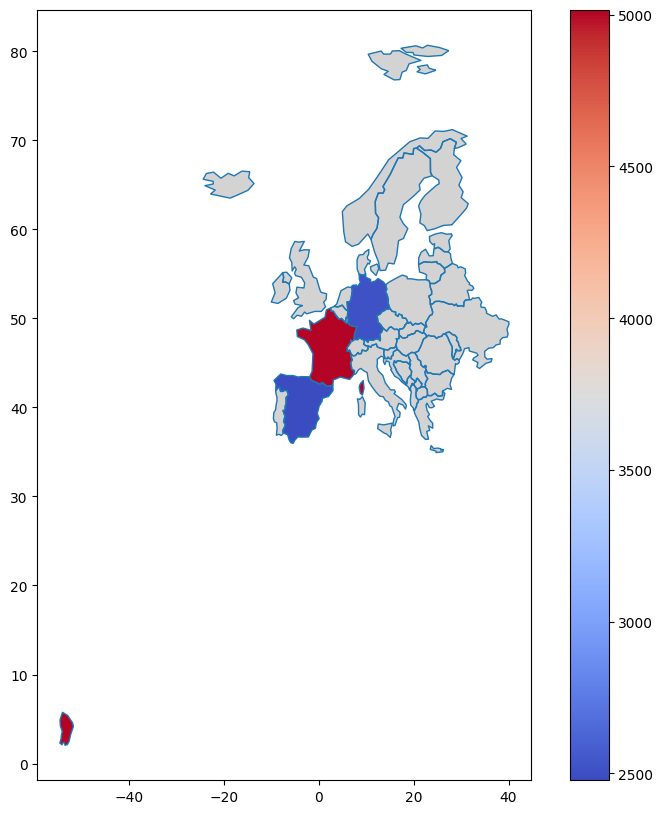

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

europe.boundary.plot(ax=ax, linewidth=1)
europe.plot(column='Density', ax=ax, legend=True, cmap='coolwarm',
           missing_kwds = {'color': 'lightgrey', 'label':'Missing Values'})

# Univariate Analysis (Continued...)

In [35]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

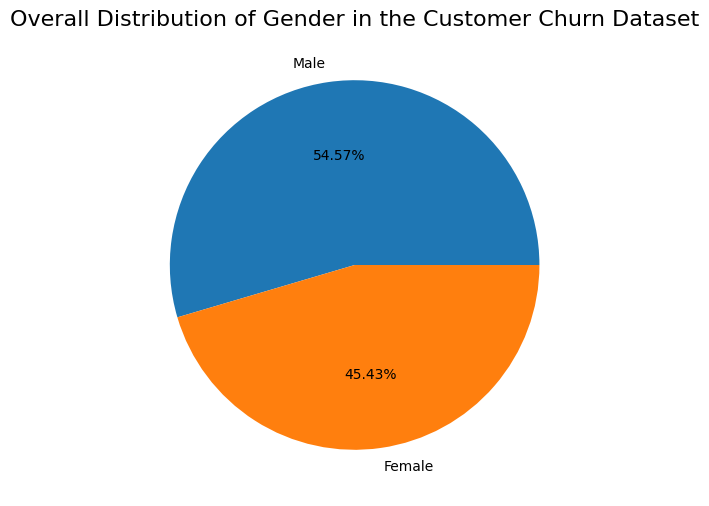

In [36]:
male_counts = 5457
female_counts = 4543


index_values = [male_counts, female_counts]
index_labels = ['Male', 'Female']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Gender in the Customer Churn Dataset', fontsize=16)

plt.show()

In [37]:
most_common_60_ages_counts = df['Age'].value_counts().head(60)
most_common_60_ages_counts

Age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
60     62
59     62
61     53
21     53
62     52
63     40
20     40
64     37
67     37
66     35
71     27
19     27
18     22
69     22
72     21
68     19
74     18
65     18
70     18
73     13
76     11
77     10
75      9
Name: count, dtype: int64

In [38]:
age_counts = df['Age'].value_counts()
age_counts

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

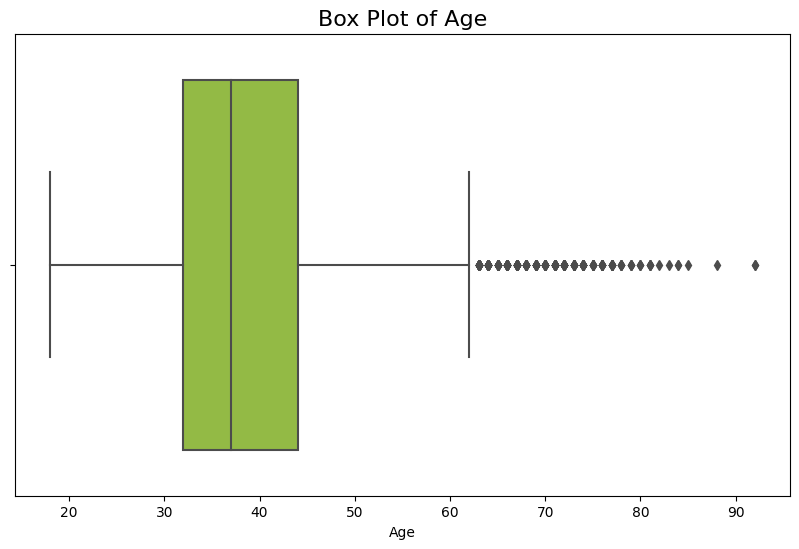

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Age'], color='yellowgreen')

plt.title('Box Plot of Age', fontsize=16)
plt.xlabel('Age')

plt.show()

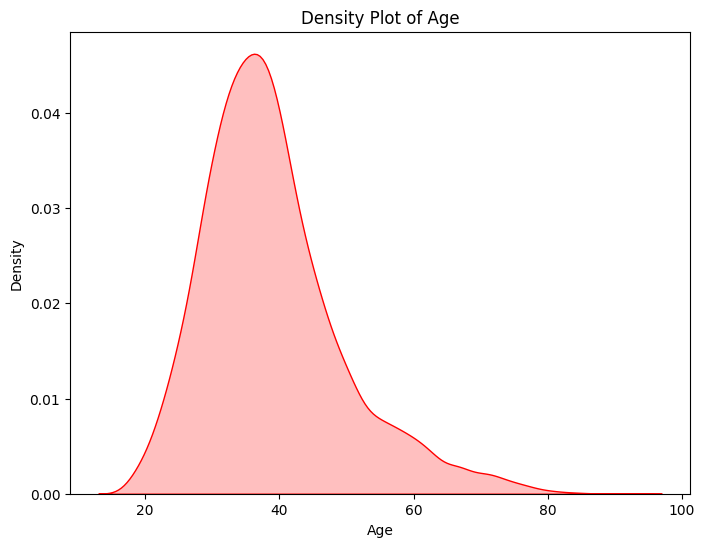

In [40]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', shade=True, color='red')
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

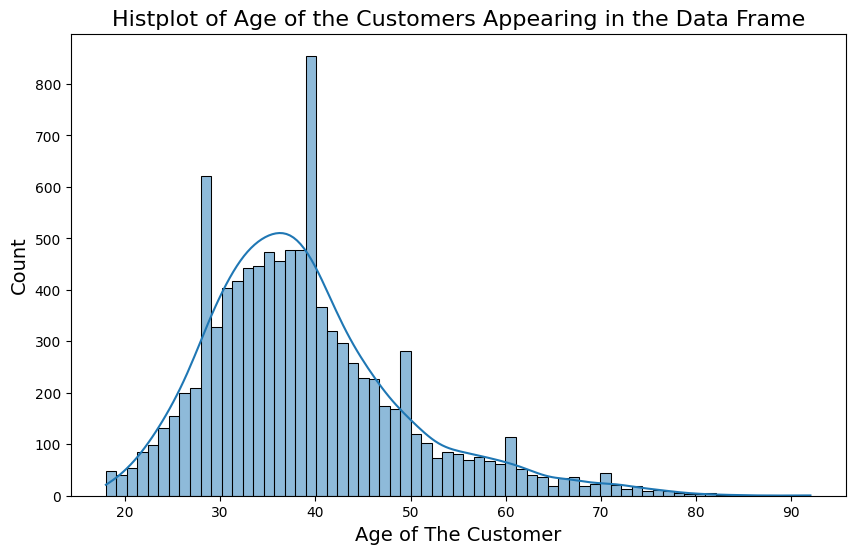

In [41]:
plt.figure(figsize=(10,6))
plt.xlabel("Age of The Customer", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Histplot of Age of the Customers Appearing in the Data Frame", fontsize=16)
sns.histplot(data=df, x="Age", kde=True)

plt.show()

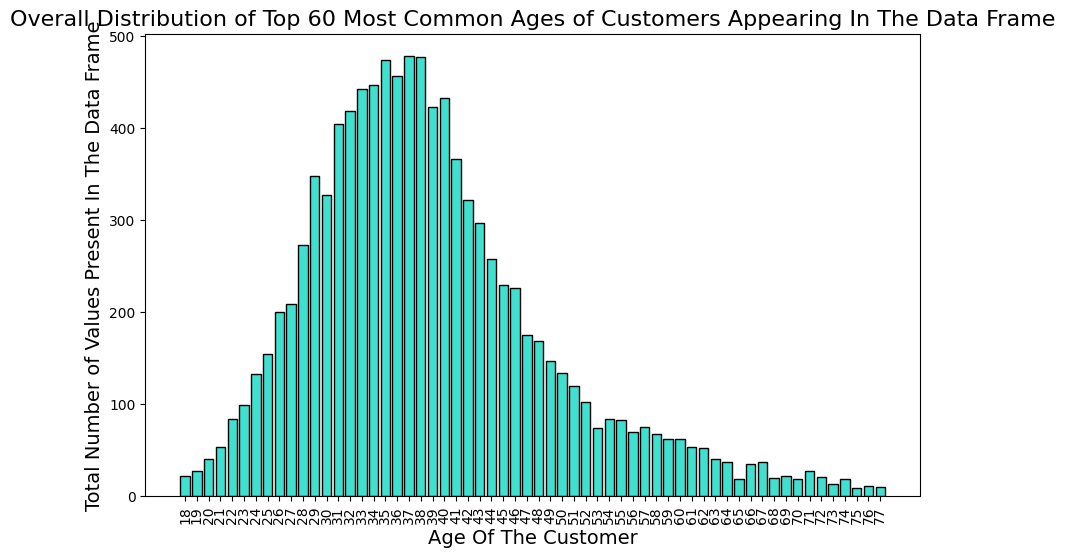

In [42]:
plt.figure(figsize=(10,6))
plt.bar(most_common_60_ages_counts.index, most_common_60_ages_counts.values, color='turquoise', edgecolor='black')

plt.xticks(most_common_60_ages_counts.index, most_common_60_ages_counts.index, rotation=90)

plt.xlabel("Age Of The Customer", fontsize=14)
plt.ylabel("Total Number of Values Present In The Data Frame", fontsize=14)
plt.title("Overall Distribution of Top 60 Most Common Ages of Customers Appearing In The Data Frame", fontsize=16)

plt.show()

Age Target : 25-50 to improve on the customer retention.

In [43]:
tenure_counts = df['Tenure'].value_counts()
tenure_counts

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

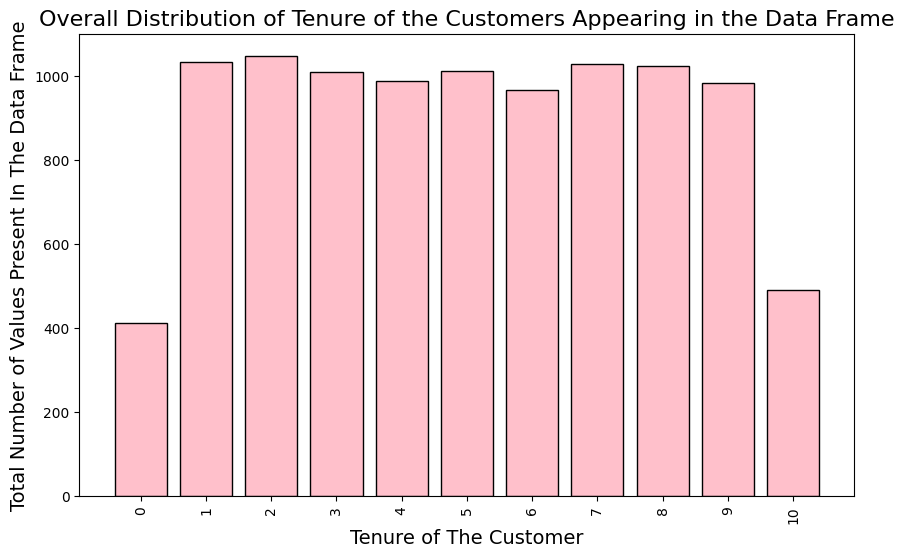

In [44]:
plt.figure(figsize=(10,6))
plt.bar(tenure_counts.index, tenure_counts.values, color='pink', edgecolor='black')

plt.xticks(tenure_counts.index, tenure_counts.index, rotation=90)

plt.xlabel("Tenure of The Customer", fontsize=14)
plt.ylabel("Total Number of Values Present In The Data Frame", fontsize=14)
plt.title("Overall Distribution of Tenure of the Customers Appearing in the Data Frame", fontsize=16)

plt.show()

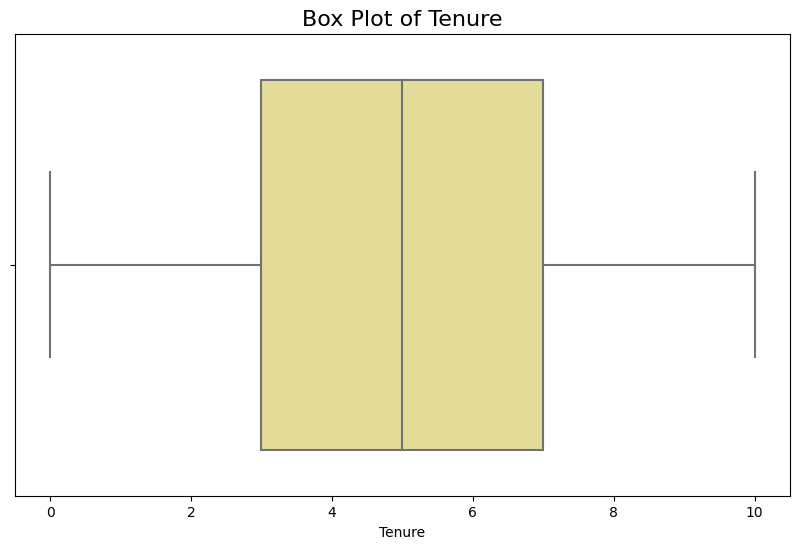

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Tenure'], color='khaki')

plt.title('Box Plot of Tenure', fontsize=16)
plt.xlabel('Tenure')

plt.show()

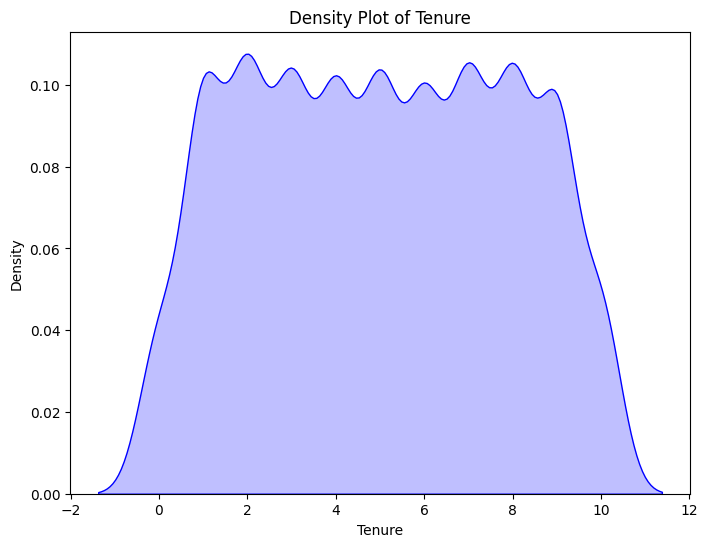

In [46]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Tenure', shade=True, color='blue')
plt.title('Density Plot of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

In [47]:
balance_counts = df['Balance'].value_counts()
balance_counts

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [48]:
df['Balance'].value_counts().head(10)

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
144238.70       1
112262.84       1
109106.80       1
142147.32       1
109109.33       1
Name: count, dtype: int64

In [49]:
top3_balance_counts = df['Balance'].value_counts().head(3)
top3_balance_counts

Balance
0.00         3617
130170.82       2
105473.74       2
Name: count, dtype: int64

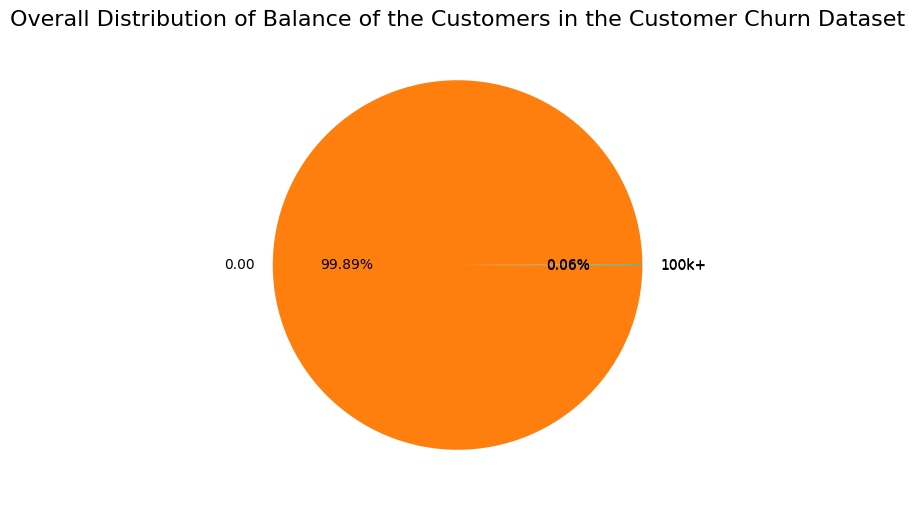

In [50]:
balance0 = 3617
balance130170 = 2
balance105473 = 2


index_values = [balance130170, balance0, balance105473]
index_labels = ['100k+','0.00', '100k+']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Balance of the Customers in the Customer Churn Dataset', fontsize=16)

plt.show()

Most of the customers left because their balance was *ZERO*.

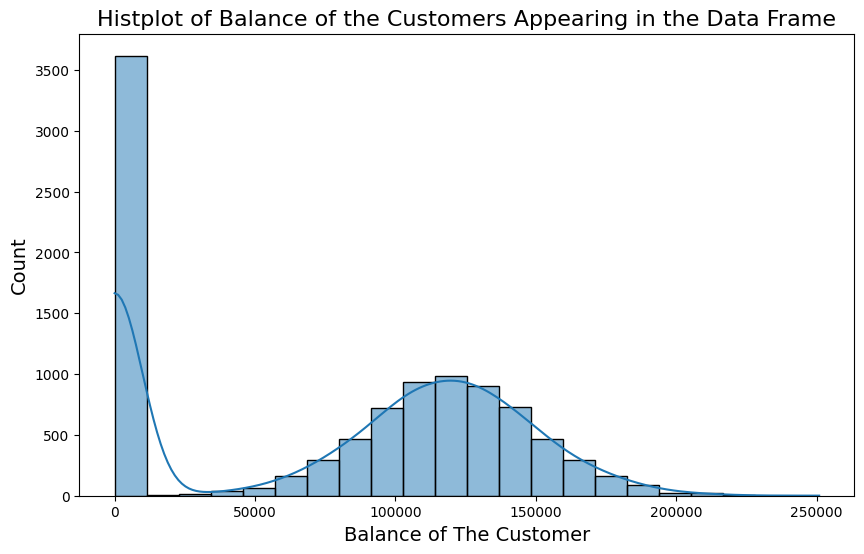

In [51]:
plt.figure(figsize=(10,6))
plt.xlabel("Balance of The Customer", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Histplot of Balance of the Customers Appearing in the Data Frame", fontsize=16)
sns.histplot(data=df, x="Balance", kde=True)

plt.show()

We see a good distribution in the customers having balance between 75k and 175k. So, we would want to focus more on those.

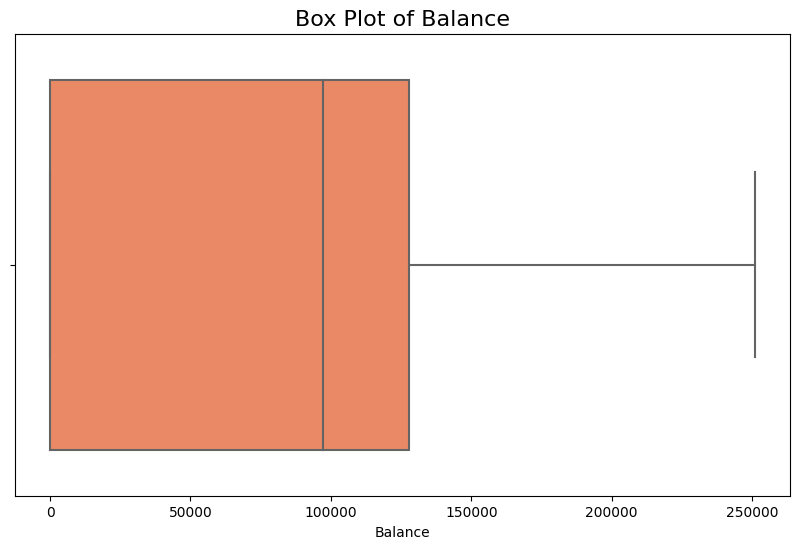

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Balance'], color='coral')

plt.title('Box Plot of Balance', fontsize=16)
plt.xlabel('Balance')

plt.show()

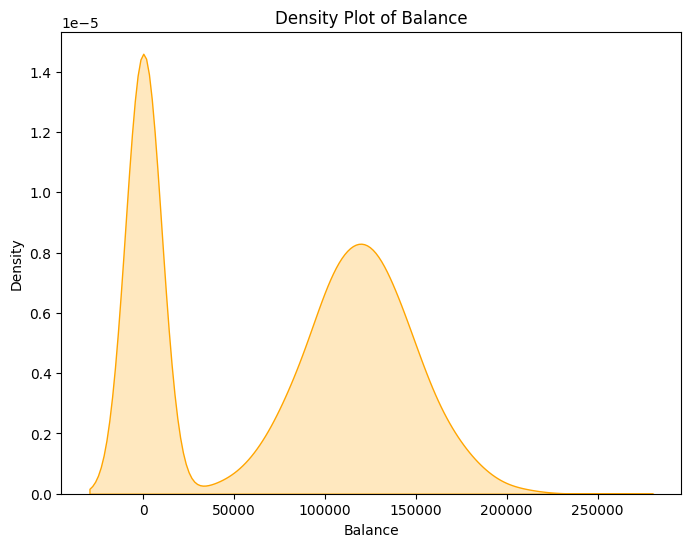

In [53]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Balance', shade=True, color='orange')
plt.title('Density Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

In [54]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

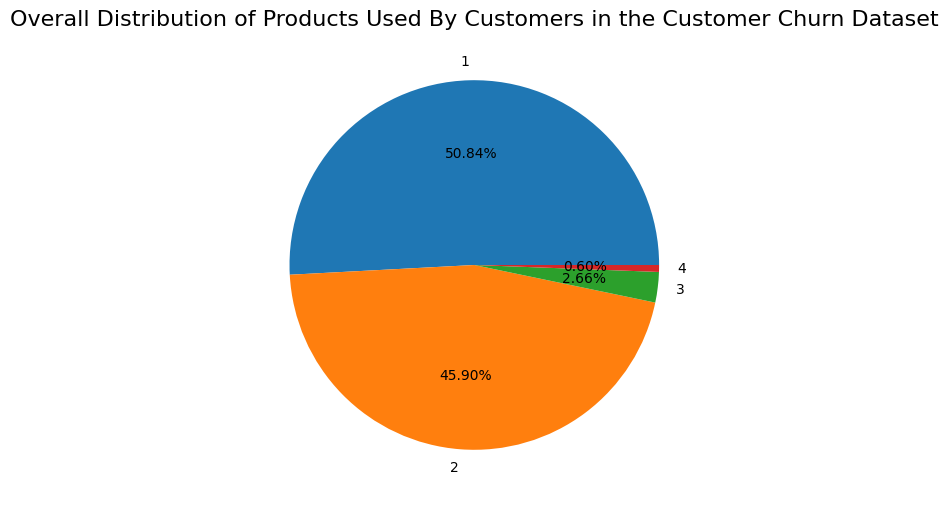

In [55]:
Products1 = 5084
Products2 = 4590
Products3 = 266
Products4 = 60

index_values = [Products1, Products2, Products3, Products4]
index_labels = ['1','2', '3', '4']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Products Used By Customers in the Customer Churn Dataset', fontsize=16)

plt.show()

Most People use 1 Product followed by 2 Products in the Customer Churn Dataset. So, we can focus on increasing the number of products consumed by the Customer.

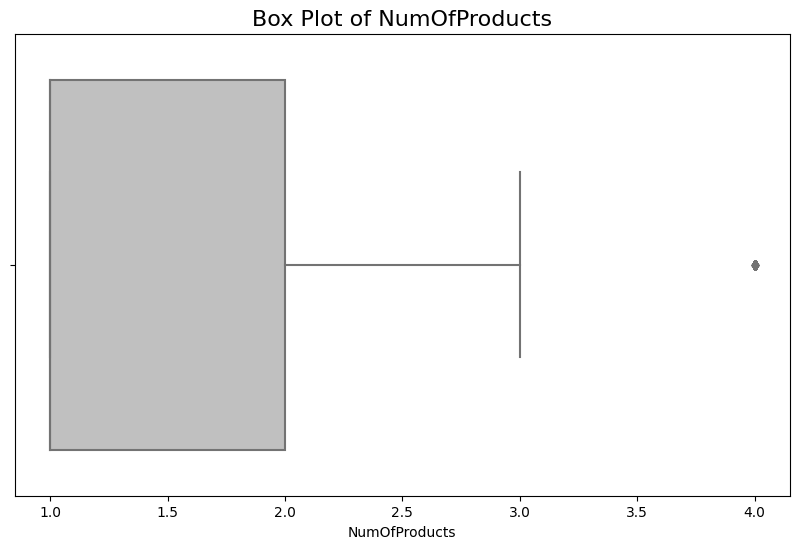

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['NumOfProducts'], color='silver')

plt.title('Box Plot of NumOfProducts', fontsize=16)
plt.xlabel('NumOfProducts')

plt.show()

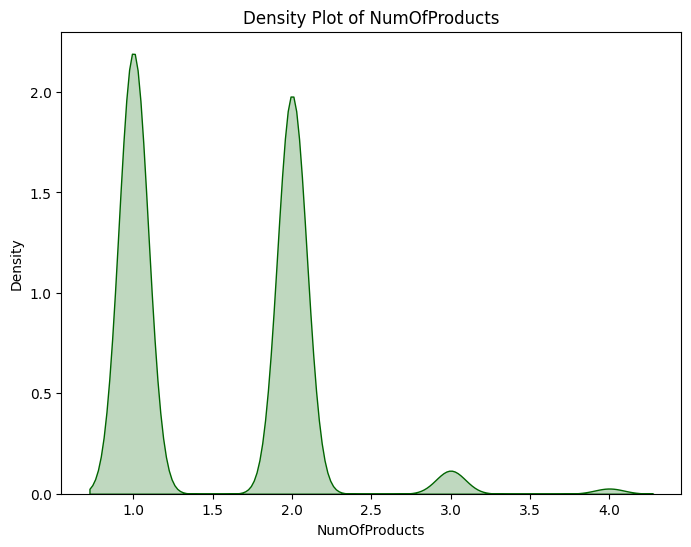

In [57]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='NumOfProducts', shade=True, color='darkgreen')
plt.title('Density Plot of NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Density')
plt.show()

In [58]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

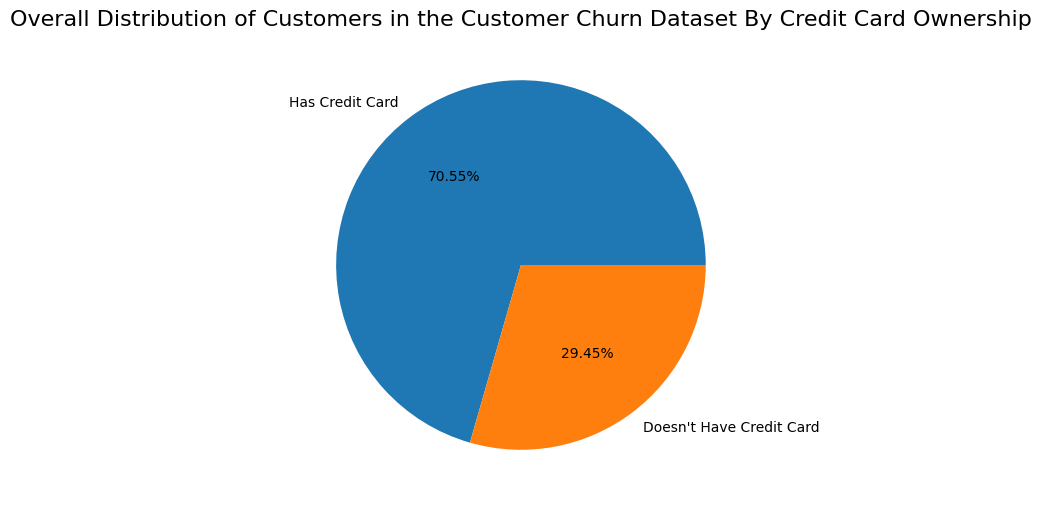

In [59]:
HasCrCard1 = 7055
HasCrCard0 = 2945

index_values = [HasCrCard1, HasCrCard0]
index_labels = ['Has Credit Card',"Doesn't Have Credit Card"]

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Customers in the Customer Churn Dataset By Credit Card Ownership', fontsize=16)

plt.show()

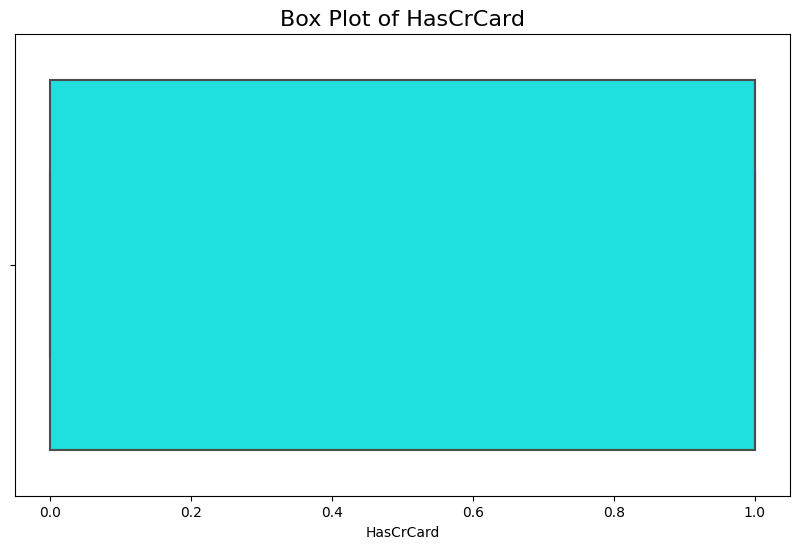

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['HasCrCard'], color='cyan')

plt.title('Box Plot of HasCrCard', fontsize=16)
plt.xlabel('HasCrCard')

plt.show()

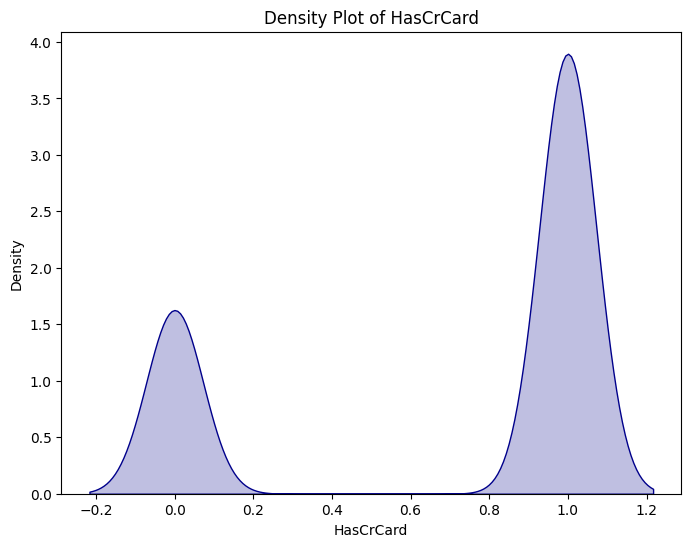

In [61]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='HasCrCard', shade=True, color='darkblue')
plt.title('Density Plot of HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('Density')
plt.show()

In [62]:
# IsActiveMember         2
# EstimatedSalary     9999
# Exited                 2

In [63]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

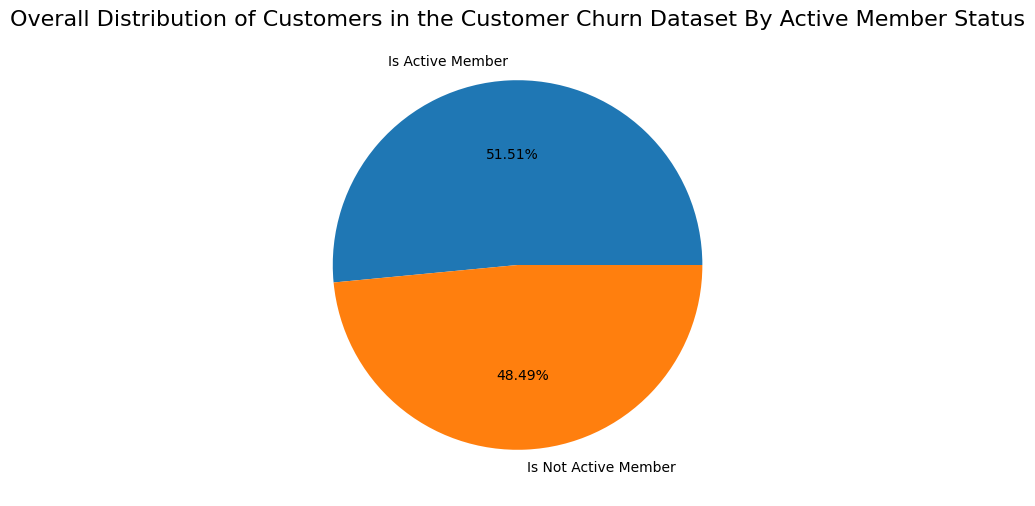

In [64]:
IsActiveMember1 = 5151
IsActiveMember0 = 4849

index_values = [IsActiveMember1, IsActiveMember0]
index_labels = ['Is Active Member','Is Not Active Member']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Customers in the Customer Churn Dataset By Active Member Status', fontsize=16)

plt.show()

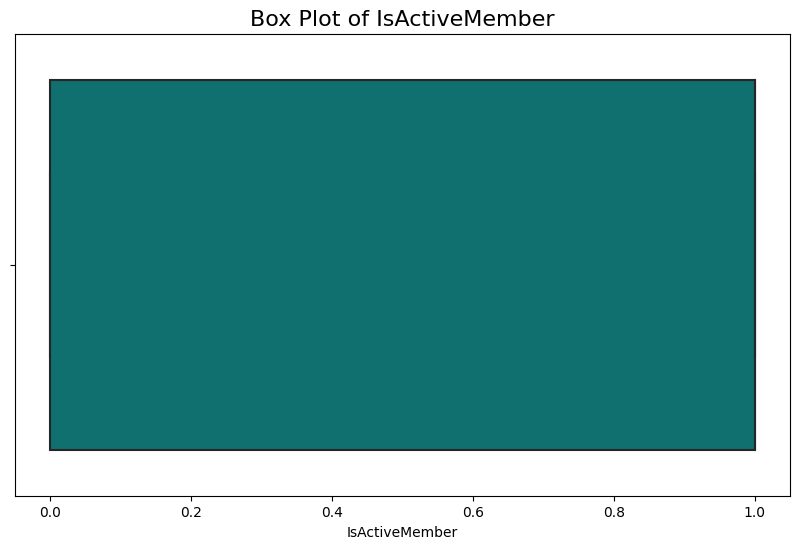

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['IsActiveMember'], color='teal')

plt.title('Box Plot of IsActiveMember', fontsize=16)
plt.xlabel('IsActiveMember')

plt.show()

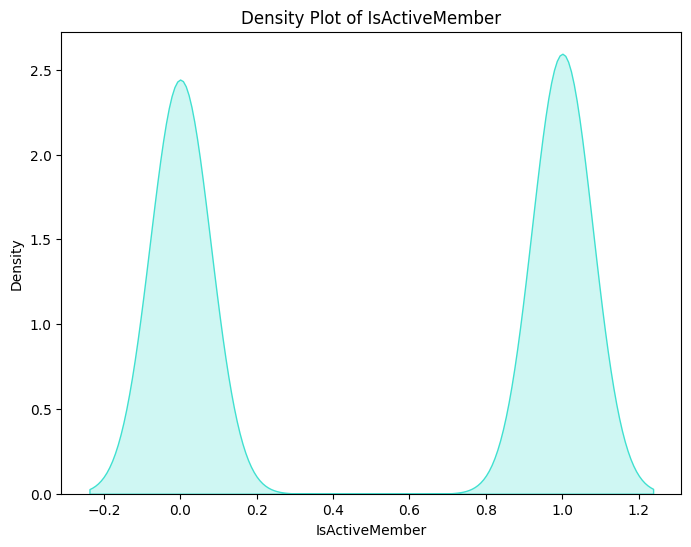

In [66]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='IsActiveMember', shade=True, color='turquoise')
plt.title('Density Plot of IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Density')
plt.show()

In [67]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

In [68]:
df['EstimatedSalary'].mean()

100090.239881

In [69]:
df['EstimatedSalary'].median()

100193.915

In [70]:
df['EstimatedSalary'].min()

11.58

In [71]:
df['EstimatedSalary'].max()

199992.48

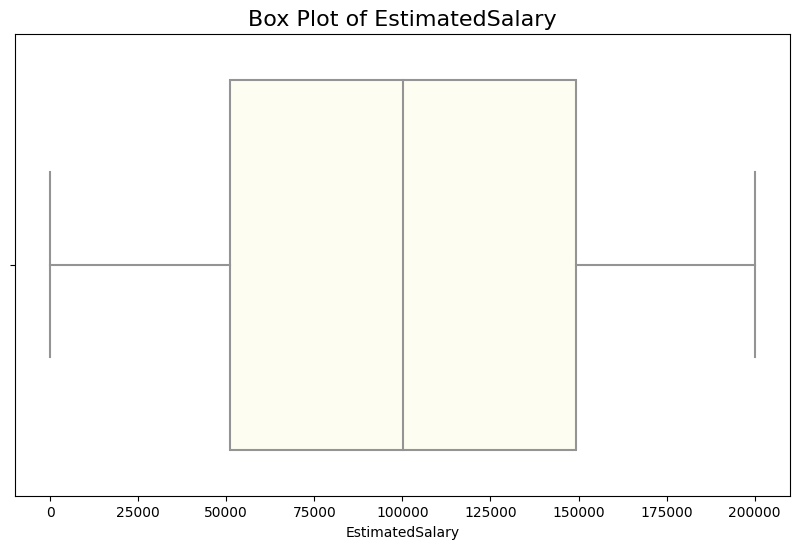

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['EstimatedSalary'], color='ivory')

plt.title('Box Plot of EstimatedSalary', fontsize=16)
plt.xlabel('EstimatedSalary')

plt.show()

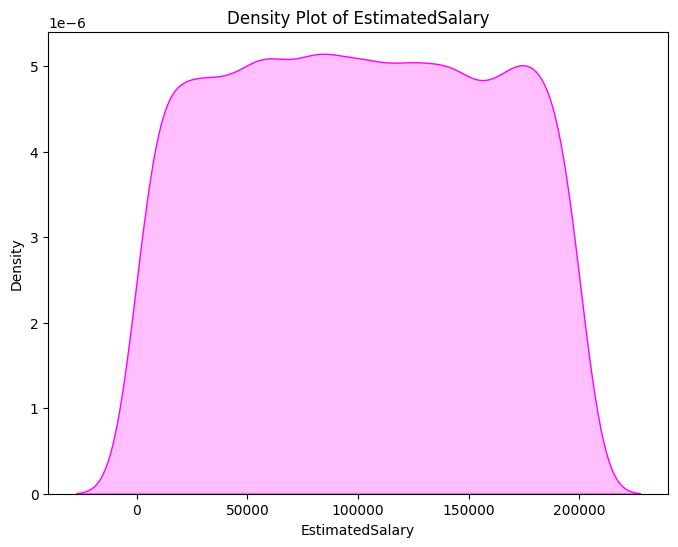

In [73]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='EstimatedSalary', shade=True, color='magenta')
plt.title('Density Plot of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')
plt.show()

In [74]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

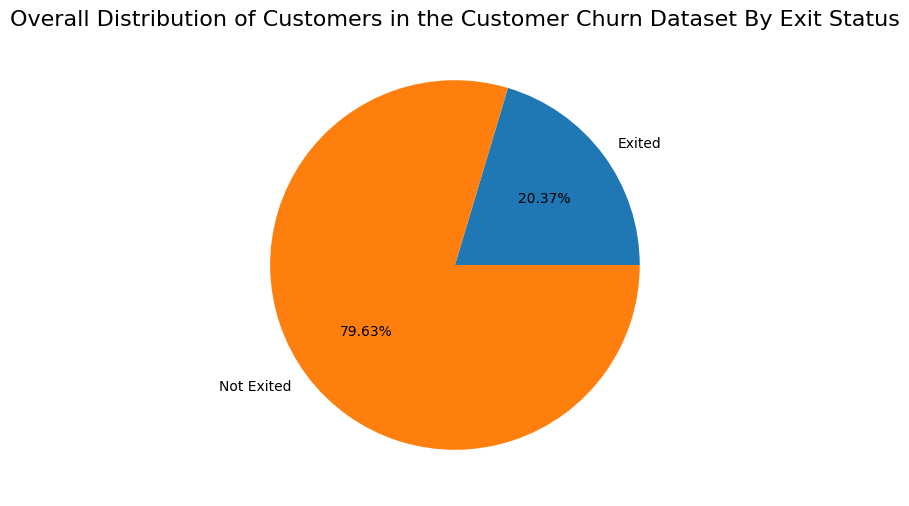

In [75]:
Exited1 = 2037
Exited0 = 7963

index_values = [Exited1, Exited0]
index_labels = ['Exited','Not Exited']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Customers in the Customer Churn Dataset By Exit Status', fontsize=16)

plt.show()

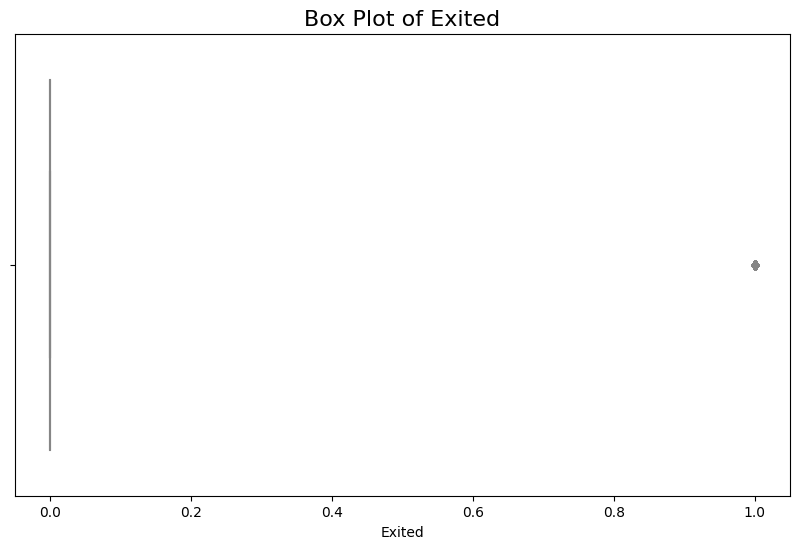

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Exited'], color='pink')

plt.title('Box Plot of Exited', fontsize=16)
plt.xlabel('Exited')

plt.show()

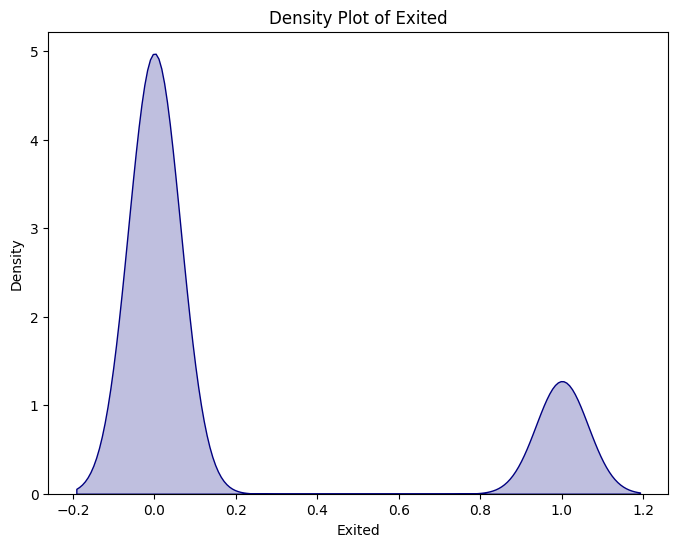

In [77]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Exited', shade=True, color='navy')
plt.title('Density Plot of Exited')
plt.xlabel('Exited')
plt.ylabel('Density')
plt.show()

# Bivariate Analysis

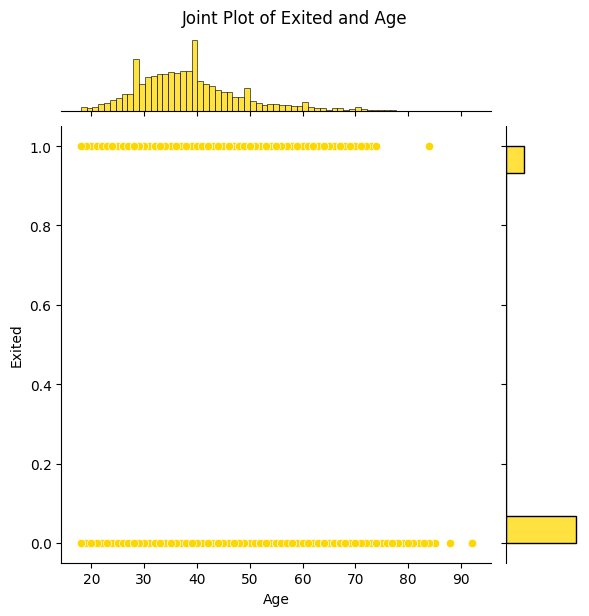

In [78]:
sns.jointplot(x='Age', y='Exited', data=df, color='gold')
plt.suptitle('Joint Plot of Exited and Age', y=1.02)
plt.show()

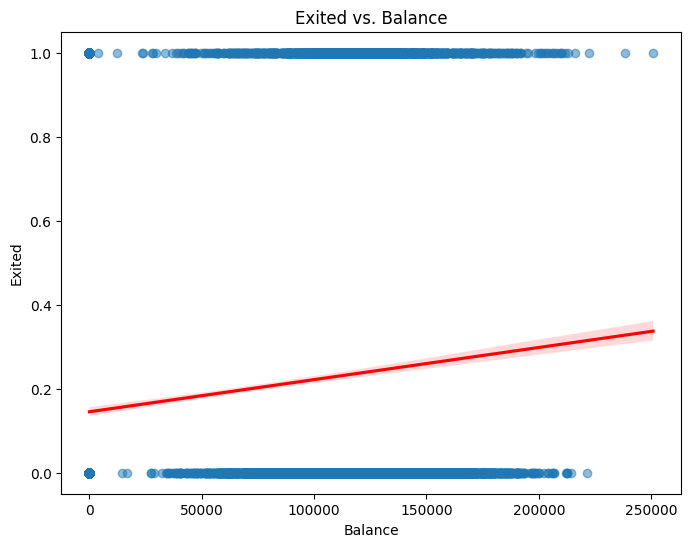

In [79]:
plt.figure(figsize=(8,6))
sns.regplot(x='Balance', y='Exited', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Exited vs. Balance')
plt.xlabel('Balance')
plt.ylabel('Exited')
plt.show()

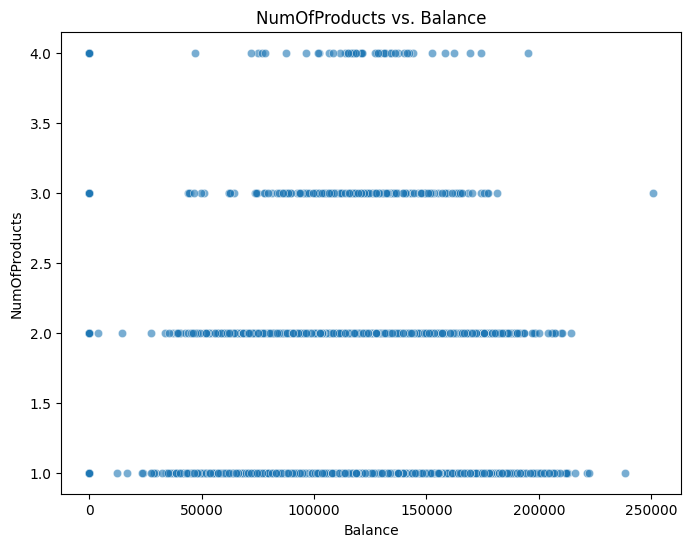

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Balance', y='NumOfProducts', palette='Set1', alpha=0.6)
plt.title('NumOfProducts vs. Balance')
plt.xlabel('Balance')
plt.ylabel('NumOfProducts')
plt.show()

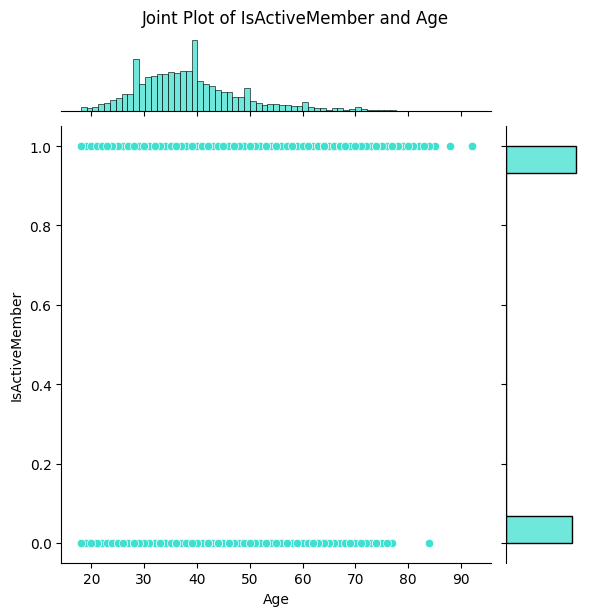

In [81]:
sns.jointplot(x='Age', y='IsActiveMember', data=df, color='turquoise')
plt.suptitle('Joint Plot of IsActiveMember and Age', y=1.02)
plt.show()

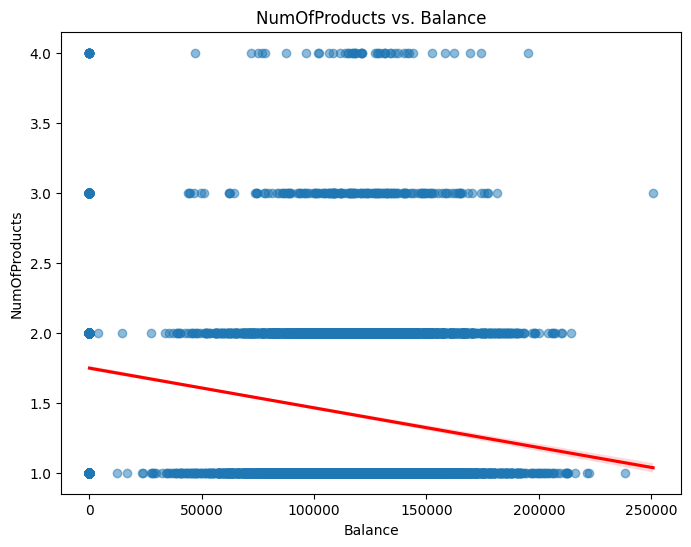

In [82]:
plt.figure(figsize=(8,6))
sns.regplot(x='Balance', y='NumOfProducts', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('NumOfProducts vs. Balance')
plt.xlabel('Balance')
plt.ylabel('NumOfProducts')
plt.show()

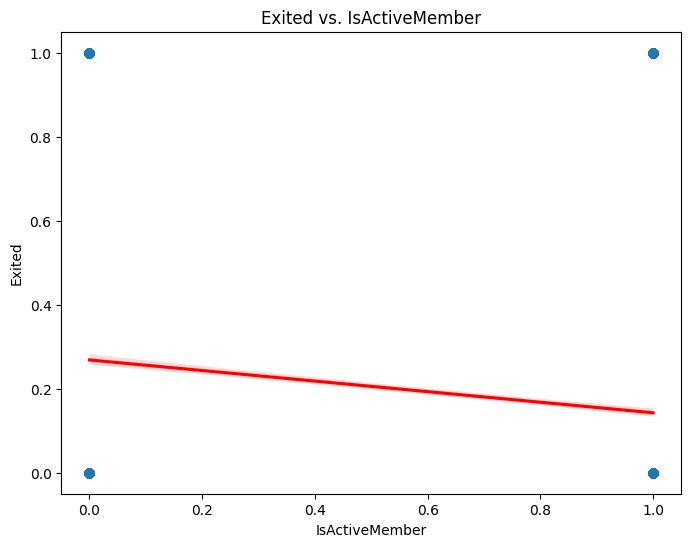

In [83]:
plt.figure(figsize=(8,6))
sns.regplot(x='IsActiveMember', y='Exited', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Exited vs. IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Exited')
plt.show()

# Multivariate Analysis

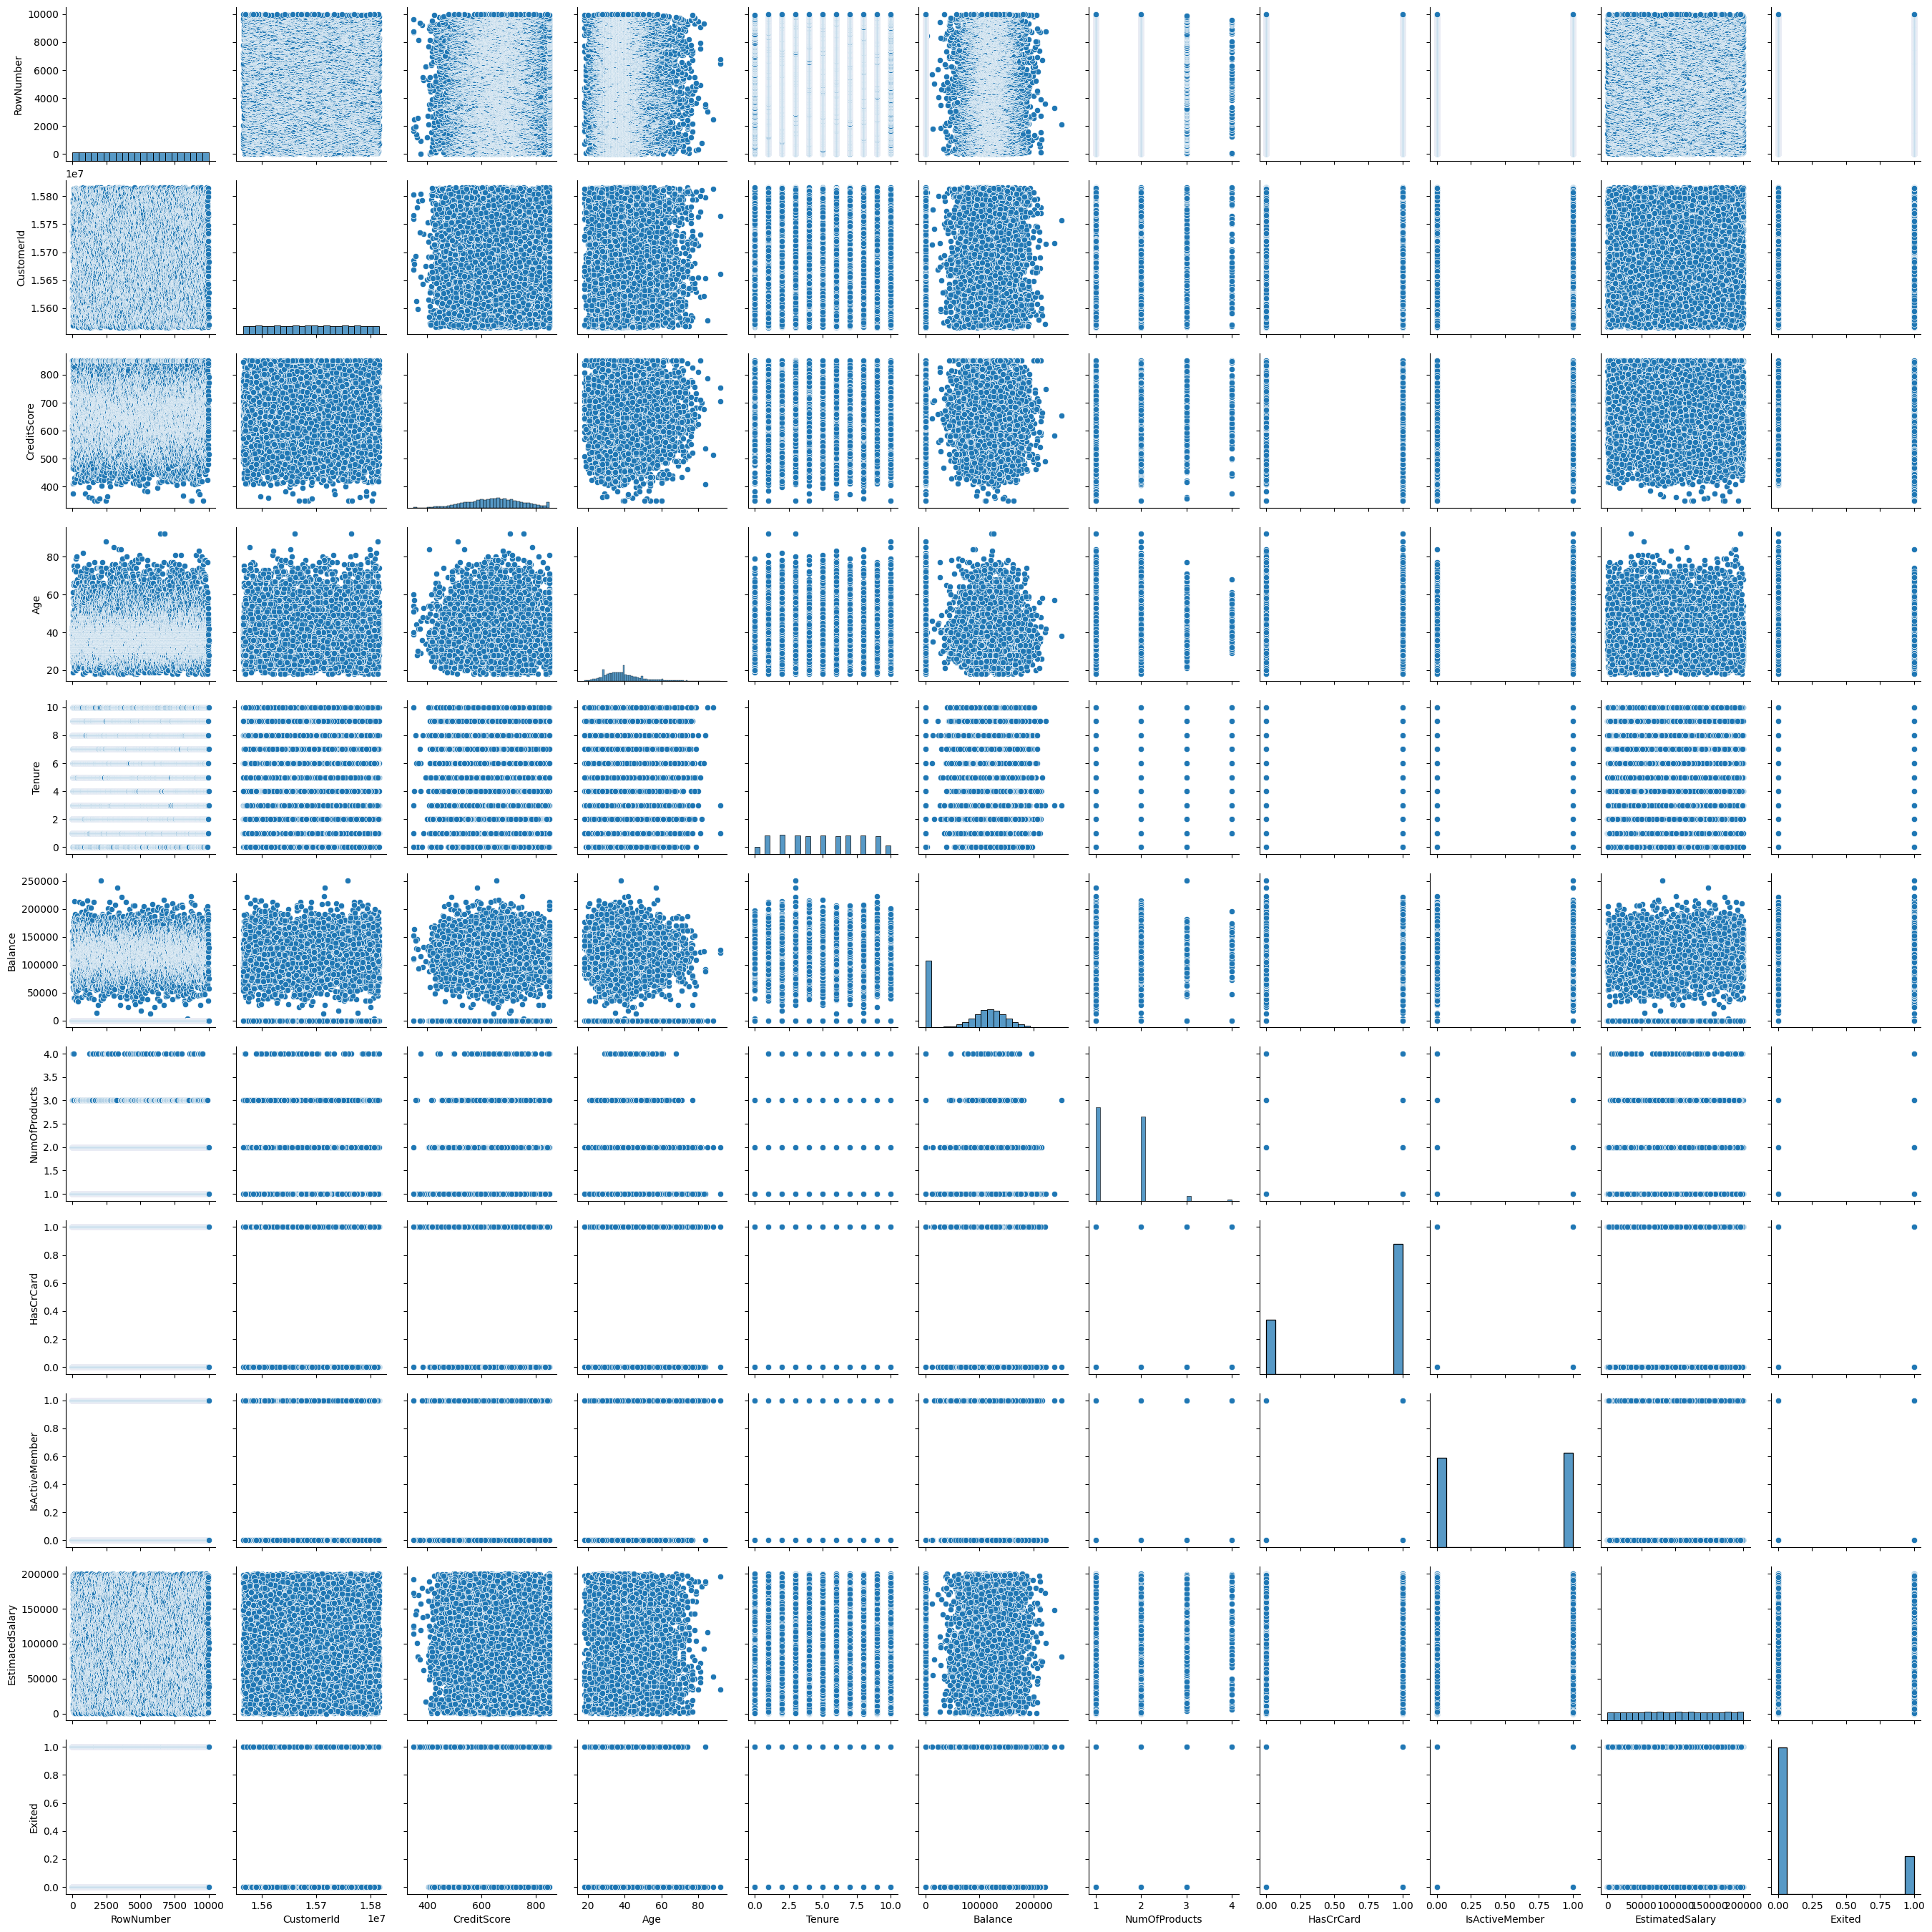

In [84]:
sns.pairplot(df)

In [85]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

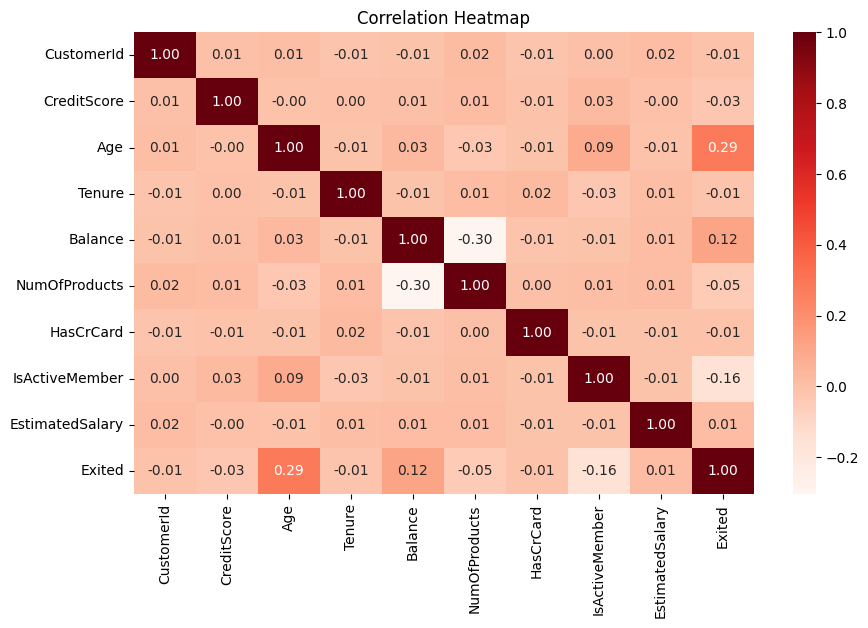

In [86]:
plt.figure(figsize=(10,6))
corr_matrix = df.drop(columns=['RowNumber', 'Surname', 'Geography', 'Gender']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Classification Model 1 : Random Forest Classifier

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
df_cleaned = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [89]:
label_encoder = LabelEncoder()
df_cleaned['Geography'] = label_encoder.fit_transform(df_cleaned['Geography'])
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])

In [90]:
X = df_cleaned.drop(columns=['Exited'])
y = df_cleaned['Exited']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [92]:
rf_classifier = RandomForestClassifier(random_state=29)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=29)

In [93]:
y_pred = rf_classifier.predict(X_test)

In [94]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8586666666666667


In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[2296   70]
 [ 354  280]]


In [97]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2366
           1       0.80      0.44      0.57       634

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



# Classification Model 2 : CatBoost Classifier

In [98]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [99]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [100]:
# We have already cleaned the dataframe - see cleaned_df above,
# Also we have encoded Geography and Gender usinf the LabelEncoder in the cleaned dataframe as done before training the rf_classifier model

In [101]:
# Prediction and target features remain the same as in the above model
X = df_cleaned.drop(columns=['Exited'])
y = df_cleaned['Exited']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [103]:
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=False, random_state=29)
catboost_model.fit(X_train, y_train)

In [104]:
y_pred = catboost_model.predict(X_test)

In [105]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8630


In [107]:
precision = precision_score(y_test, y_pred)
print(f'Precision : {precision:.4f}')

Precision : 0.7719


In [108]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

Recall: 0.4868


In [109]:
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.5971


# Classification Model 3 : XGBoost Classifier 

In [110]:
import xgboost as xgb

In [111]:
# We have already cleaned the dataframe - see cleaned_df above,
# Also we have encoded Geography and Gender usinf the LabelEncoder in the cleaned dataframe as done before training the rf_classifier model

In [112]:
# Prediction and target features remain the same as in the above model
X = df_cleaned.drop(columns=['Exited'])
y = df_cleaned['Exited']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [114]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder = False, eval_metric='logloss', random_state=29, n_estimators=100, max_depth=3, learning_rate = 0.1, subsample=0.8, colsample_bytree=0.8)

In [115]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=29, ...)

In [116]:
y_pred = xgb_classifier.predict(X_test)

In [117]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8615


In [119]:
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1583
           1       0.80      0.45      0.57       417

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



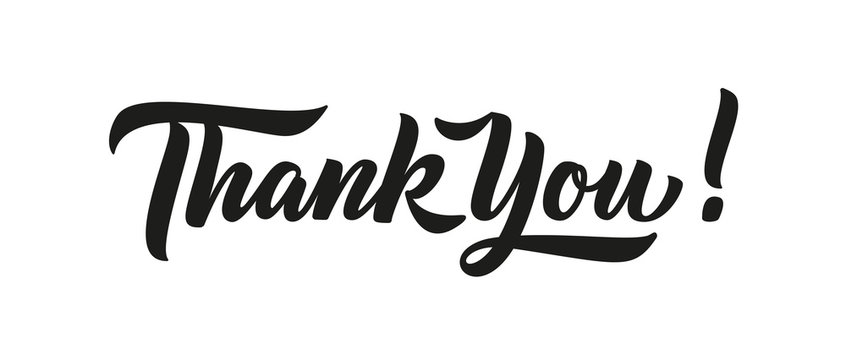